# 0. Formatting Xenium's experiment output into SpatialData

The purpose of this notebook is to format the output of a Xenium experiment into a SpatialData object, cropping a region of interest for the example notebooks

## Import packages

In [3]:
import spatialdata_io

We use ``the spatialdata_io.xenium`` reader to read Xenium's output as spatial data:

In [ ]:
path = "/media/sergio/Discovair_final/Xenium_Prime_Mouse_Brain_Coronal_FF_outs"
sdata = spatialdata_io.xenium(path)

/tmp/ipykernel_434509/1030367490.py:3: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata=spatialdata_io.xenium(path)


INFO     reading /media/sergio/Discovair_final/Xenium_Prime_Mouse_Brain_Coronal_FF_outs/cell_feature_matrix.h5     


We can save this spatialdata (sdata) object as zarr:

In [ ]:
outpath = "/media/sergio/Discovair_final/mousebrain_prime.zarr"
sdata.write(outpath)

/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/tifffile/tifffile.py:8884: UserWarning: <tifffile.TiffPage 0 @16> reading array from closed file
  warnings.warn(


INFO     The Zarr backing store has been changed from None the new file path:                                      
         /media/sergio/Discovair_final/mousebrain_prime.zarr                                                       


The sdata object can be also subset to a small region of interest for faster analysis:

In [5]:
cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[17500, 0],
    max_coordinate=[35000, 15000],
    target_coordinate_system="global",
)

cropped_sdata

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 15000, 16654), (5, 7500, 8327), (5, 3750, 4163), (5, 1875, 2082), (5, 937, 1041)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (15000, 16654), (7500, 8327), (3750, 4163), (1875, 2082), (937, 1041)
│     └── 'nucleus_labels': DataTree[yx] (15000, 16654), (7500, 8327), (3750, 4163), (1875, 2082), (937, 1041)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (25247, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (25170, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (25151, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (25170, 5006)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), cell_labels (Labels), nucleus_labels (Labels), transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shapes)

We can visualize the ``cropped_sdata`` object using SpatialData plotting functions:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.774563629373318].


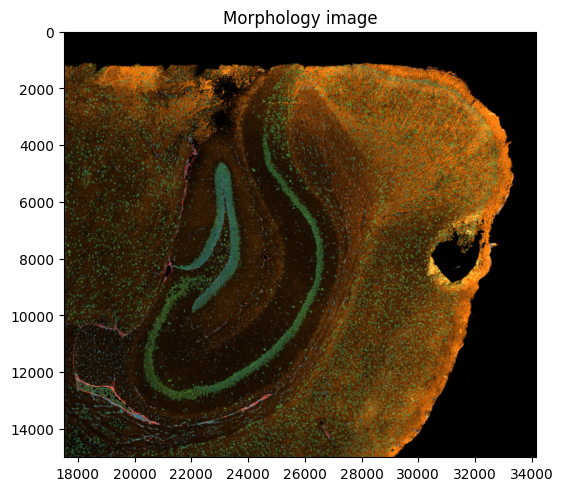

In [8]:
cropped_sdata.pl.render_images("morphology_focus").pl.show(title="Morphology image")

Finally, we can save the cropped sdata object to a zarr file, same as we did for the full dataset

In [7]:
xenium_path_cropped = "/media/sergio/Discovair_final/mousebrain_prime_half.zarr"
cropped_sdata.write(xenium_path_cropped)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside /media/sergio/Discovair_final/mousebrain_prime_half.zarr). Please see the documentation 
         of `is_self_contained()` to understand the implications of working with SpatialData objects that are not  
         self-contained.                                                                                           
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /media/sergio/Discovair_final/mousebrain_prime_half.zarr                                                  
